In [1]:
#import packages
import fermipy
from fermipy.gtanalysis import GTAnalysis
import astropy.io.fits as pyfits

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image, display
from glob import glob

## Get the data from the LAT Data Server

The two point sources located within the nebula are cataloged as J0534.5+2200 and J0534.5+2201i, which respectively model the Crab pulsar and the Crab Nebula. <br>

http://gamma-sky.net/#/cat/tev/25

Using the link: https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi

<img src="searchres.png" style="width: 300px;" />

<img src="searchparams.png" style="width: 300px;" />

In [3]:
#do this just once, otherwise one needs to re-generate the data and the links!!!!
## 2011 april flare: 100MeV-500 GeV   (5-500 GeV range results in a fit failure later)

#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L1906041212485CA465FA35_SC00.fits
#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L1906041212485CA465FA35_PH00.fits

## LAT Background Models <br>
(https://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html) <br>

#### Galactic interstellar emission model
gll_iem_v07.fits  <br>

#### Event Selection/IRF Name
Pass 8 Source (front+back, allPSF, allEDISP) P8R3_SOURCE_V2  <br>

#### Isotropic spectral template
iso_P8R3_SOURCE_V2_v1.txt <br>


## Configuration File <br>
The first step is to compose a configuration file that defines the data selection and analysis parameters. fermiPy uses the YAML format for its configuration files. The configuration file has a hierarchical organization that groups related parameters into separate dictionaries.

In [4]:
####data:  the input data set and spacecraft file for the analysis. 
#evfile: photon data
#scfile: spacecraft data

####binning: The parameters in the binning section define the dimensions of the ROI and the spatial and energy bin size.

####selection: section defines parameters related to the data selection (energy range, zmax cut, and event class/type). 
#The target parameter in this section defines the ROI center to have the same coordinates as the given source. 

####gtlike: performs unbinned or binned likelihood analysis of LAT data.

####model:The model section defines parameters related to the ROI model definition (diffuse templates, point sources).
# ROI observed at a zenith angle less than 90 deg so as to reduce the contamination from the albedo of Earth.

config_text ="data: \n\
  evfile : L1906041212485CA465FA35_PH00.fits\n\
  scfile : L1906041212485CA465FA35_SC00.fits\n\
\n\
binning:\n\
  roiwidth   : 10.0\n\
  binsz      : 0.1\n\
  binsperdec : 8\n\
\n\
selection :\n\
  ra : 83.6331\n\
  dec : 22.0145\n\
  emin : 100\n\
  emax : 500000\n\
  zmax    : 90\n\
  evclass : 128\n\
  evtype  : 3\n\
  tmin    : 323222402\n\
  tmax    : 325900802\n\
  filter  : null\n\
  target : 3FGL J0534.5+2201\n\
\n\
gtlike:\n\
  edisp : True\n\
  irfs : 'P8R3_SOURCE_V2'\n\
  edisp_disable : ['isodiff','galdiff']\n\
\n\
model:\n\
  src_roiwidth : 15.0\n\
  galdiff  : 'gll_iem_v07.fits'\n\
  isodiff  : 'iso_P8R3_SOURCE_V2_v1.txt'\n\
  catalogs : ['3FGL']";

with open("config.yaml",'w') as f:  
    f.write(config_text)

This gets everything ready for the likelihood analysis including instantiating the pylikelihood object. (If running again, one needs to delete the ccube.fits file, otherwise there is a error, if the rest of files exist, the procedure is skipped).

In [5]:
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})
gta.setup()

2019-06-06 13:39:41 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.3 
ScienceTools version ScienceTools-11-04-00
2019-06-06 13:39:44 INFO    GTAnalysis.setup(): Running setup.
2019-06-06 13:39:44 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2019-06-06 13:39:44 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2019-06-06 13:39:44 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=L1906041212485CA465FA35_PH00.fits outfile=/Users/hevjinyarar/Desktop/FermiLAT/Crab/ft1_00.fits ra=83.6371994019 dec=22.02409935 rad=7.57106781187 tmin=323222402.0 tmax=325900802.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2019-06-06 13:39:49 INFO    GTBinnedAnalysis.run_gtapp(): 
2019-06-06 13:39:49 INFO    GTBinnedAnalysis.run_gtapp(): WARNING: version mismatch bet

2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): 
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): This is gtsrcmaps version HEAD
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Using evtype=3 (i.e., FRONT/BACK irfs)
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R3_SOURCE_V2
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  0  1
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201i
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201s
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0526.4+2247
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0544.7+2239
2019-06-06 13:44:56 INFO    GTBinnedAnalysis.run_gtapp(): Creating source name

In [6]:
!ls -ltr *_00.fits #the photon and spacecraft files + background file (gll_iem_v07) + all the generated files

-rw-r--r--  1 hevjinyarar  staff   2681280 Jun  6 13:39 ft1_00.fits
-rw-r--r--  1 hevjinyarar  staff  16554240 Jun  6 13:41 ltcube_00.fits
-rw-r--r--  1 hevjinyarar  staff   1235520 Jun  6 13:41 ccube_00.fits
-rw-r--r--  1 hevjinyarar  staff   8058240 Jun  6 13:41 bexpmap_00.fits
-rw-r--r--  1 hevjinyarar  staff   1264320 Jun  6 13:41 bexpmap_roi_00.fits
-rw-r--r--  1 hevjinyarar  staff  28598400 Jun  6 13:45 srcmap_00.fits


* **ft1_00.fits**: Event list.  This is generated by running gtselect and gtmktime on our input file list.
* **bexpmap_00.fits**: All-sky binned exposure map.  This map is interpolated to create an exposure model when generating the srcmap file.
* **bexpmap_roi_00.fits**: Binned exposure map for the ROI.  This file is only provided for visualization purposes in order to have an exposure map with the same binning as the data and model maps.
* **ccube_00.fits**: Counts cube for the ROI.
* **ltcube_00.fits**: Livetime cube.  This contains a map of the livetime for this observation over the whole sky as a function of incidence angle.
* **srcmap_00.fits**: Source map cube.  This file contains maps for each of the components in the ROI after convolution with exposure and the PSF.  Note that energy dispersion is applied at run-time.

Note that all of the files have a numerical suffix '00'.  This is the analysis component index.  In a multi-component analysis there would be instances of all of the above files for each analysis component.  The files with no component index are co-added maps that are provided for visualization purposes.

To see example of one of these files we can open and plot the counts cube file.  This is a 3D cube that contains the distribution of events as a function of energy and two spatial coordinates.  In the example below we sum over the energy dimension of the cube to make a 2-D sky image.

Filename: ccube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (100, 100, 30)   float32   
  1  EBOUNDS       1 BinTableHDU     22   30R x 4C   [I, E, E, E]   


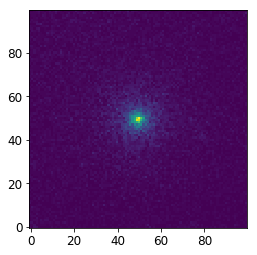

In [7]:
h = pyfits.open('ccube.fits')
h.info()
counts = h[0].data
counts.shape
plt.figure()
plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower')
plt.show()

We can now inspect the state of the ROI prior with the print_roi() method.

In [8]:
gta.print_roi()

2019-06-06 13:45:24 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0534.5+2201   PointSource    PLSuperExpCuto    0.000       nan      5159.3
3FGL J0534.5+2201i  PointSource    PowerLaw          0.006       nan       335.6
3FGL J0534.5+2201s  PointSource    PowerLaw          0.006       nan       453.4
3FGL J0526.4+2247   PointSource    PowerLaw          2.028       nan        33.0
3FGL J0544.7+2239   PointSource    PowerLaw          2.432       nan        36.0
3FGL J0521.7+2113   PointSource    PowerLaw          3.076       nan       147.5
3FGL J0528.3+1815   PointSource    PowerLaw          4.038       nan         2.5
3FGL J0538.9+1646   PointSource    PowerLaw          5.354       nan         2.8
3FGL J0517.1+2628c  PointSource    PowerLaw          5.961       nan        31.9
3FGL J0540.3+2756e  SpatialMap     PowerLaw          6.0

Additional details about an individual source can be retrieved by printing the corresponding source object. Here we use the bracket operator to return the properties of ....

In [9]:
print(gta.roi['3FGL J0534.5+2201'])

Name           : 3FGL J0534.5+2201
Associations   : ['3FGL J0534.5+2201', 'PSR J0534+2200', 'Crab', '1FHL J0534.5+2201', '2FGL J0534.5+2201', '1AGL J0535+2205', 'Crab Pulsar']
RA/DEC         :     83.637/    22.024
GLON/GLAT      :    184.551/    -5.776
TS             : nan
Npred          : 5159.31
Flux           :  2.38e-06 +/-      nan
EnergyFlux     : 0.0009187 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  5.991e-10 +/-        nan
Index1         :     -2.045 +/-        nan
Scale          :      635.6 +/-        nan
Cutoff         :       8143 +/-        nan
Index2         :          1 +/-        nan


## Likelihood Fitting <br>
The first thing to do is free some of the sources since all of the sources are initially fixed. We'll just free those sources in the center region.

In [10]:
# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free all parameters of galactic diffuse components
gta.free_source('galdiff')

2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201     : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201i    : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201s    : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0526.4+2247     : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0544.7+2239     : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor']
2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Index']


In [11]:
gta.free_source('3FGL J0534.5+2201')

2019-06-06 13:45:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201     : ['Index1', 'Cutoff']


In [12]:
fit_results = gta.fit()

2019-06-06 13:45:24 INFO    GTAnalysis.fit(): Starting fit.
2019-06-06 13:45:28 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2019-06-06 13:45:28 INFO    GTAnalysis.fit(): LogLike:   -41676.049 DeltaLogLike:     1876.902 


In [13]:
print('Fit Quality: ',fit_results['fit_quality'])
print(gta.roi['3FGL J0534.5+2201'])

('Fit Quality: ', 3)
Name           : 3FGL J0534.5+2201
Associations   : ['3FGL J0534.5+2201', 'PSR J0534+2200', 'Crab', '1FHL J0534.5+2201', '2FGL J0534.5+2201', '1AGL J0535+2205', 'Crab Pulsar']
RA/DEC         :     83.637/    22.024
GLON/GLAT      :    184.551/    -5.776
TS             : 12962.88
Npred          : 11530.25
Flux           : 5.655e-06 +/-  1.7e-07
EnergyFlux     :  0.001581 +/- 4.56e-05
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  1.629e-09 +/-  1.314e-10
Index1         :     -2.051 +/-    0.06676
Scale          :      635.6 +/-        nan
Cutoff         :       1769 +/-      343.6
Index2         :          1 +/-        nan


In [14]:
gta.write_roi('fit0',make_plots=True)

2019-06-06 13:45:28 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit0_00.xml...
2019-06-06 13:45:28 INFO    GTAnalysis.write_fits(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit0.fits...
2019-06-06 13:45:29 INFO    GTAnalysis.write_roi(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit0.npy...


In [15]:
!ls -ltr fit0*.png
pngs = glob('fit0*.png')

-rw-r--r--  1 hevjinyarar  staff  52787 Jun  6 13:45 fit0_model_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  63681 Jun  6 13:45 fit0_counts_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  25250 Jun  6 13:45 fit0_counts_map_xproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  24234 Jun  6 13:45 fit0_counts_map_yproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  53480 Jun  6 13:45 fit0_counts_spectrum.png


fit0_counts_spectrum.png

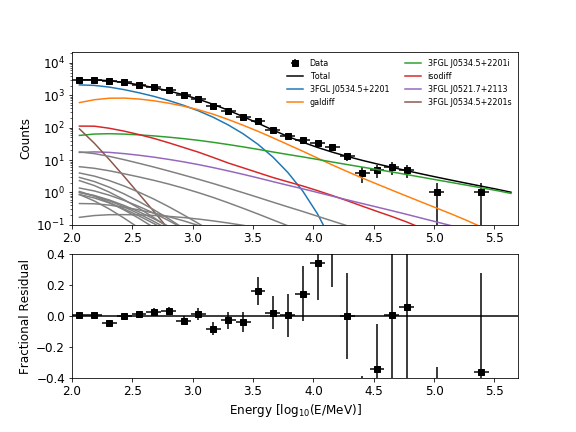

 None


In [16]:
print(pngs[0]),display(Image(pngs[0]))  

fit0_model_map_2.000_5.699.png

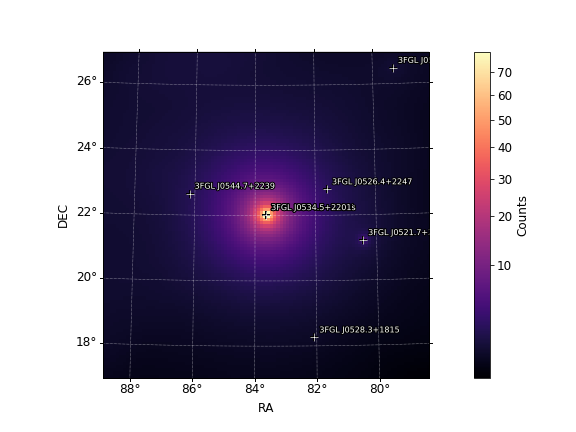

 None


In [17]:
print(pngs[1]),display(Image(pngs[1]))  

fit0_counts_map_2.000_5.699.png

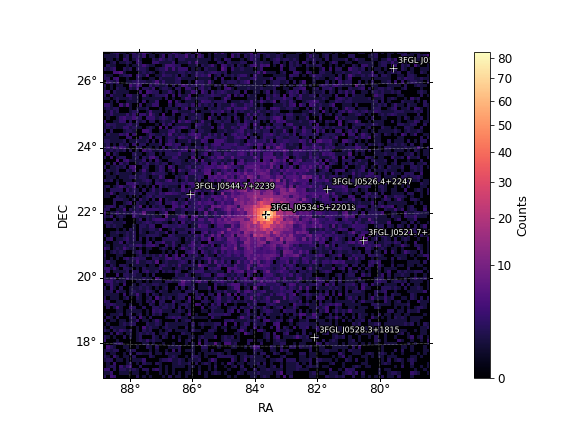

 None


In [18]:
print(pngs[2]),display(Image(pngs[2]))  

fit0_counts_map_xproj_2.000_5.699.png

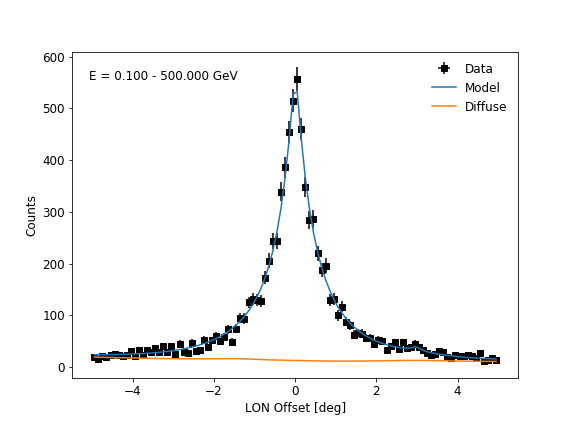

 None


In [19]:
print(pngs[3]),display(Image(pngs[3]))  

fit0_counts_map_yproj_2.000_5.699.png

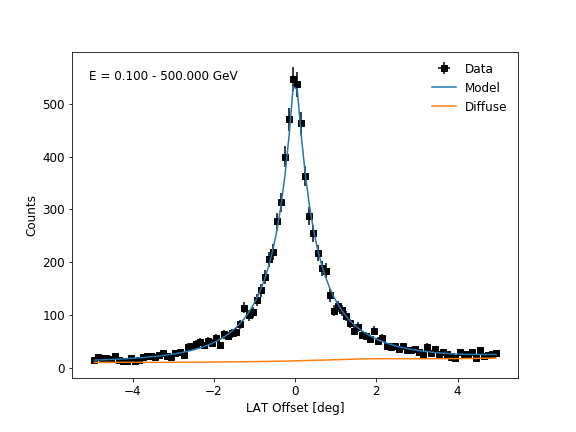

 None


In [20]:
print(pngs[4]),display(Image(pngs[4]))  

In [21]:
!mkdir flare_2011
!mv *_00.fits flare_2011/
!mv *.par flare_2011/
!mv *.log flare_2011/
!mv fit0* flare_2011/
!mv *xml flare_2011/
!mv ccube.fits flare_2011/
!ls 

CrabPulsar.ipynb                  flare_2011
L1906040815125CA465FA12_PH00.fits flare_2011_old
L1906040815125CA465FA12_SC00.fits gll_iem_v07.fits
L1906041212485CA465FA35_PH00.fits iso_P8R3_SOURCE_V2_v1.txt
L1906041212485CA465FA35_SC00.fits noflare_2011_old
alldata                           searchparams.png
config.yaml                       searchres.png


## Reading the results from the output python file

In [22]:
py = np.load('flare_2011/fit0.npy').flat[0]

For example "sources" dictionary has an entry for each source in the model

In [23]:
sorted(py['sources'].keys())

['3FGL J0510.0+1802',
 '3FGL J0512.2+2918',
 '3FGL J0515.8+1526',
 '3FGL J0517.1+2628c',
 '3FGL J0519.3+2746',
 '3FGL J0521.7+2113',
 '3FGL J0524.4+2839',
 '3FGL J0526.4+2247',
 '3FGL J0528.3+1815',
 '3FGL J0534.5+2201',
 '3FGL J0534.5+2201i',
 '3FGL J0534.5+2201s',
 '3FGL J0538.9+1646',
 '3FGL J0539.8+1434',
 '3FGL J0540.3+2756e',
 '3FGL J0544.7+2239',
 '3FGL J0601.5+2309',
 '3FGL J0603.3+2042',
 '3FGL J0603.8+2155',
 '3FGL J0605.9+2039c',
 'galdiff',
 'isodiff']

In [24]:
## flux
py['sources']['3FGL J0534.5+2201']['flux']

5.65493976316169e-06

In [1]:
## spectral parameters
print(py['sources']['3FGL J0534.5+2201']['param_names'][:4]) #the rest is empty
print(py['sources']['3FGL J0534.5+2201i']['param_values'][:4])
print(py['sources']['3FGL J0534.5+2201s']['param_values'][:4])

NameError: name 'py' is not defined

In [26]:
## test statistic
print(py['sources']['3FGL J0534.5+2201']['ts'])

12962.8849788


## No Flares

In [27]:
#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L1906040815125CA465FA12_PH00.fits
#!curl -OL https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L1906040815125CA465FA12_SC00.fits

In [28]:
####data:  the input data set and spacecraft file for the analysis. 
#evfile: photon data
#scfile: spacecraft data

####binning: The parameters in the binning section define the dimensions of the ROI and the spatial and energy bin size.

####selection: section defines parameters related to the data selection (energy range, zmax cut, and event class/type). 
#The target parameter in this section defines the ROI center to have the same coordinates as the given source. 

####gtlike: performs unbinned or binned likelihood analysis of LAT data.

####model:The model section defines parameters related to the ROI model definition (diffuse templates, point sources).

config_text ="data: \n\
  evfile : L1906040815125CA465FA12_PH00.fits\n\
  scfile : L1906040815125CA465FA12_SC00.fits\n\
\n\
binning:\n\
  roiwidth   : 10.0\n\
  binsz      : 0.1\n\
  binsperdec : 8\n\
\n\
selection :\n\
  ra : 343.494812\n\
  dec : 16.1495\n\
  emin : 100\n\
  emax : 500000\n\
  zmax    : 90\n\
  evclass : 128\n\
  evtype  : 3\n\
  tmin    : 315532802\n\
  tmax    : 318211202\n\
  filter  : null\n\
  target : Crab Pulsar\n\
\n\
gtlike:\n\
  edisp : True\n\
  irfs : 'P8R3_SOURCE_V2'\n\
  edisp_disable : ['isodiff','galdiff']\n\
\n\
model:\n\
  src_roiwidth : 15.0\n\
  galdiff  : 'gll_iem_v07.fits'\n\
  isodiff  : 'iso_P8R3_SOURCE_V2_v1.txt'\n\
  catalogs : ['3FGL']";

with open("config2.yaml",'w') as f:  
    f.write(config_text)

In [29]:
#!rm ccube.fits
gta = GTAnalysis('config2.yaml',logging={'verbosity' : 3})
gta.setup()

2019-06-06 13:45:36 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.3 
ScienceTools version ScienceTools-11-04-00
2019-06-06 13:45:38 INFO    GTAnalysis.setup(): Running setup.
2019-06-06 13:45:38 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2019-06-06 13:45:38 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2019-06-06 13:45:38 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=L1906040815125CA465FA12_PH00.fits outfile=/Users/hevjinyarar/Desktop/FermiLAT/Crab/ft1_00.fits ra=83.6371994019 dec=22.02409935 rad=7.57106781187 tmin=315532802.0 tmax=318211202.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2019-06-06 13:45:39 INFO    GTBinnedAnalysis.run_gtapp(): 
2019-06-06 13:45:39 INFO    GTBinnedAnalysis.run_gtapp(): WARNING: version mismatch bet

2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201i
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0534.5+2201s
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0526.4+2247
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0544.7+2239
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0521.7+2113
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0528.3+1815
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0538.9+1646
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0517.1+2628c
2019-06-06 13:50:58 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0540.3+2756e
2019-06-06 13:50

Filename: flare_2011/ccube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (100, 100, 30)   float32   
  1  EBOUNDS       1 BinTableHDU     22   30R x 4C   [I, E, E, E]   


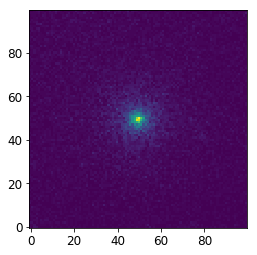

In [52]:
h = pyfits.open('ccube.fits')
h.info()
counts = h[0].data
counts.shape
plt.figure()
plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower')
plt.show()

In [31]:
gta.print_roi()

2019-06-06 13:51:14 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0534.5+2201   PointSource    PLSuperExpCuto    0.000       nan      3826.9
3FGL J0534.5+2201i  PointSource    PowerLaw          0.006       nan       259.4
3FGL J0534.5+2201s  PointSource    PowerLaw          0.006       nan       288.9
3FGL J0526.4+2247   PointSource    PowerLaw          2.028       nan        24.1
3FGL J0544.7+2239   PointSource    PowerLaw          2.432       nan        25.8
3FGL J0521.7+2113   PointSource    PowerLaw          3.076       nan       112.2
3FGL J0528.3+1815   PointSource    PowerLaw          4.038       nan         1.9
3FGL J0538.9+1646   PointSource    PowerLaw          5.354       nan         2.2
3FGL J0517.1+2628c  PointSource    PowerLaw          5.961       nan        23.1
3FGL J0540.3+2756e  SpatialMap     PowerLaw          6.0

In [32]:
print(gta.roi['3FGL J0534.5+2201'])

Name           : 3FGL J0534.5+2201
Associations   : ['3FGL J0534.5+2201', 'PSR J0534+2200', 'Crab', '1FHL J0534.5+2201', '2FGL J0534.5+2201', '1AGL J0535+2205', 'Crab Pulsar']
RA/DEC         :     83.637/    22.024
GLON/GLAT      :    184.551/    -5.776
TS             : nan
Npred          : 3826.90
Flux           :  2.38e-06 +/-      nan
EnergyFlux     : 0.0009187 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff
Spectral Parameters
Prefactor      :  5.991e-10 +/-        nan
Index1         :     -2.045 +/-        nan
Scale          :      635.6 +/-        nan
Cutoff         :       8143 +/-        nan
Index2         :          1 +/-        nan


## Likelihood Fitting <br>


In [33]:
# Free Normalization of all Sources within 5 deg of ROI center
gta.free_sources(distance=5.0,pars='norm')

# Free all parameters of galactic diffuse components
gta.free_source('galdiff')

2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201     : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201i    : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201s    : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0526.4+2247     : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0544.7+2239     : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0521.7+2113     : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0528.3+1815     : ['Prefactor']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for

In [34]:
gta.free_source('3FGL J0534.5+2201')

2019-06-06 13:51:14 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0534.5+2201     : ['Index1', 'Cutoff']


In [35]:
gta.write_roi('fit1',make_plots=True)

2019-06-06 13:51:14 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit1_00.xml...
2019-06-06 13:51:14 INFO    GTAnalysis.write_fits(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit1.fits...
2019-06-06 13:51:16 INFO    GTAnalysis.write_roi(): Writing /Users/hevjinyarar/Desktop/FermiLAT/Crab/fit1.npy...


In [36]:
!ls -ltr fit1*.png
pngs1 = glob('fit1*.png')

-rw-r--r--  1 hevjinyarar  staff  51811 Jun  6 13:51 fit1_model_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  58583 Jun  6 13:51 fit1_counts_map_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  25230 Jun  6 13:51 fit1_counts_map_xproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  24282 Jun  6 13:51 fit1_counts_map_yproj_2.000_5.699.png
-rw-r--r--  1 hevjinyarar  staff  55141 Jun  6 13:51 fit1_counts_spectrum.png


fit1_counts_map_xproj_2.000_5.699.png

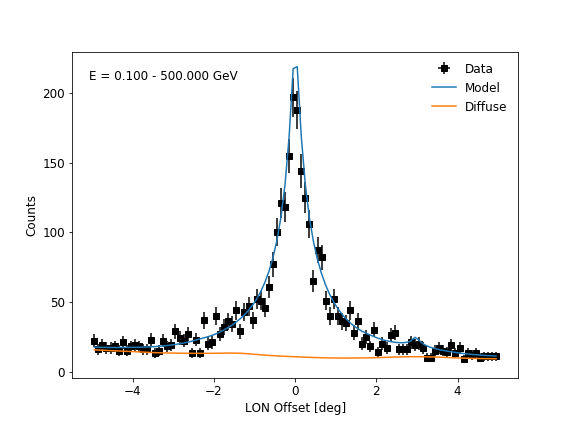

 None


In [37]:
print(pngs1[0]),display(Image(pngs1[0]))  

fit1_counts_spectrum.png

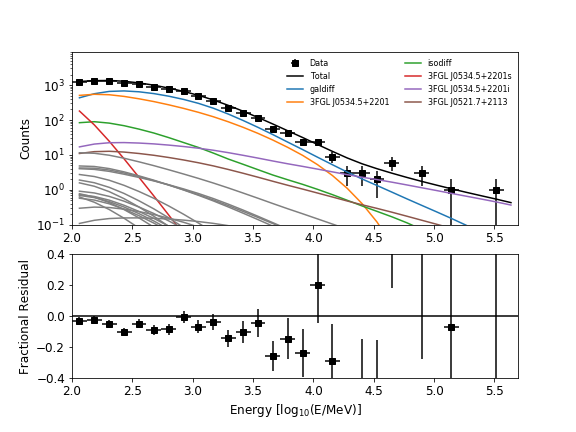

 None


In [38]:
print(pngs1[1]),display(Image(pngs1[1]))  

fit1_counts_map_yproj_2.000_5.699.png

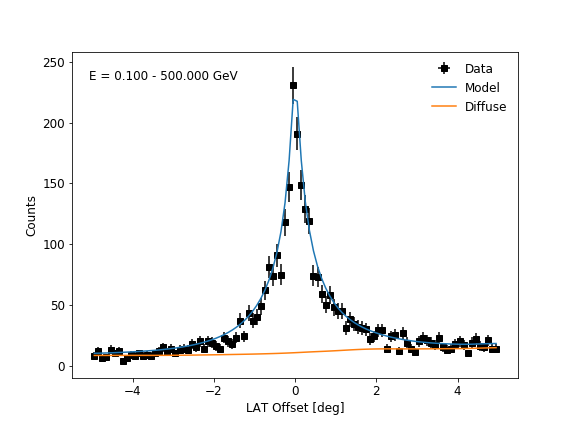

 None


In [39]:
print(pngs1[2]),display(Image(pngs1[2]))  

fit1_counts_map_2.000_5.699.png

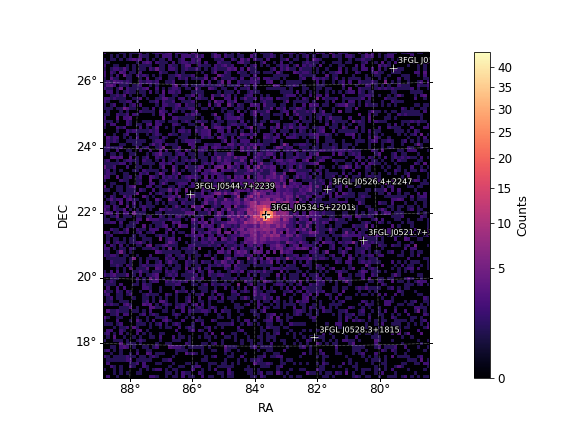

 None


In [40]:
print(pngs1[3]),display(Image(pngs1[3]))  

fit1_model_map_2.000_5.699.png

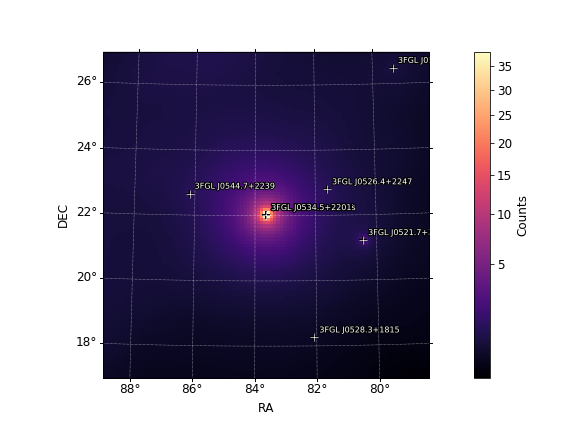

 None


In [41]:
print(pngs1[4]),display(Image(pngs1[4]))  

In [42]:
!mkdir noflare_2011
!mv *_00.fits noflare_2011/
!mv *.par noflare_2011/
!mv *.log noflare_2011/
!mv fit1* noflare_2011/
!mv *xml noflare_2011/
!mv ccube.fits noflare_2011/
!ls 

mv: rename *.log to noflare_2011/*.log: No such file or directory
CrabPulsar.ipynb                  flare_2011
L1906040815125CA465FA12_PH00.fits flare_2011_old
L1906040815125CA465FA12_SC00.fits gll_iem_v07.fits
L1906041212485CA465FA35_PH00.fits iso_P8R3_SOURCE_V2_v1.txt
L1906041212485CA465FA35_SC00.fits noflare_2011
alldata                           noflare_2011_old
config.yaml                       searchparams.png
config2.yaml                      searchres.png


In [45]:
py1 = np.load('noflare_2011/fit1.npy').flat[0]

In [46]:
sorted(py1['sources'].keys())

['3FGL J0510.0+1802',
 '3FGL J0512.2+2918',
 '3FGL J0515.8+1526',
 '3FGL J0517.1+2628c',
 '3FGL J0519.3+2746',
 '3FGL J0521.7+2113',
 '3FGL J0524.4+2839',
 '3FGL J0526.4+2247',
 '3FGL J0528.3+1815',
 '3FGL J0534.5+2201',
 '3FGL J0534.5+2201i',
 '3FGL J0534.5+2201s',
 '3FGL J0538.9+1646',
 '3FGL J0539.8+1434',
 '3FGL J0540.3+2756e',
 '3FGL J0544.7+2239',
 '3FGL J0601.5+2309',
 '3FGL J0603.3+2042',
 '3FGL J0603.8+2155',
 '3FGL J0605.9+2039c',
 'galdiff',
 'isodiff']

In [47]:
## flux
py1['sources']['3FGL J0534.5+2201']['flux']

2.380082515896614e-06

In [48]:
## spectral parameters
print(py1['sources']['3FGL J0534.5+2201']['param_names'][:4]) #the rest is empty
print(py1['sources']['3FGL J0534.5+2201']['param_values'][:4])

['Prefactor' 'Index1' 'Scale' 'Cutoff']
[  5.99114591e-10  -2.04500866e+00   6.35591125e+02   8.14304346e+03]


In [49]:
## test statistic
print(py1['sources']['3FGL J0534.5+2201']['ts'])

nan
